In [ ]:
from lambeq import BobcatParser, Rewriter, AtomicType, IQPAnsatz, remove_cups
from lambeq import Dataset, TketModel,  QuantumTrainer, SPSAOptimizer
from discopy import grammar

#from pytket.circuit.display import render_circuit_jupyter
#from pytket.extensions.qiskit import tk_to_qiskit, AerBackend

import os
import warnings
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
os.environ['TOKENIZERS_PARALLELISM'] = 'false'

In [3]:
fl = open('datasets/MC1.txt', 'r')

In [4]:
data = []
for line in fl:
    l = line.strip().split(',')
    data.append(l)
fl.close()

In [5]:
diagram = []
parser = BobcatParser( verbose='suppress') 
for i in range(5):
    sentence =  data[i][0]  #'food is prepared by a chef' 

    # Parse the sentence and convert it into a string diagram
    #root_cats=['N', 'NP'],
    diagram.append(parser.sentence2diagram(sentence))

    #grammar.draw(diagram, figsize=(14,3), fontsize=12)

In [8]:
diagram[0].draw(figsize=(14,3), fontsize=12, path='sentence_diagram.pdf')
#plt.savefig('sentence_diagram.pdf', dpi='figure')

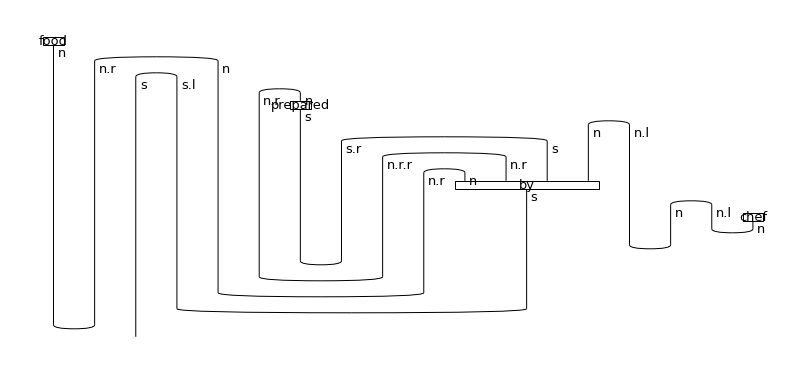

In [5]:
rewriter = Rewriter(['auxiliary', 'determiner', 'curry'])
rewritten_diagram = rewriter(diagram)

rewritten_diagram.draw(figsize=(11,5), fontsize=13)

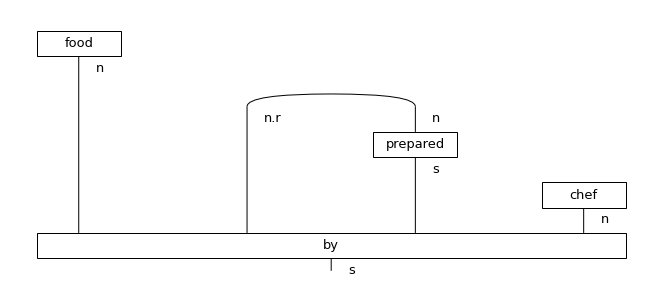

In [6]:
normalised_diagram = rewritten_diagram.normal_form()
normalised_diagram.draw(figsize=(9,4), fontsize=13)

In [ ]:
# Define atomic types
N = AtomicType.NOUN
S = AtomicType.SENTENCE

# Convert string diagram to quantum circuit
ansatz = IQPAnsatz({N: 1, S: 1}, n_layers=1, n_single_qubit_params=7)
discopy_circuit = [ansatz(d) for d in diagram]
#discopy_circuit.draw(figsize=(15,10))

In [48]:
from sympy import default_sort_key

parameters = sorted(
   { sym for circ in discopy_circuit for sym in circ.free_symbols},
    key=default_sort_key
)
param_dict = {p: i * 0.001 for i, p in enumerate(parameters)}
#param_dict

In [50]:
nc = [d.lambdify(*param_dict[*parameters])(*parameters)  for d in discopy_circuit]#, discopy_circuit
#d = discopy_circuit[0].to_tk()
#d.symbol_substitution(param_dict)

SyntaxError: invalid syntax (2274159116.py, line 1)

In [46]:
discopy_circuit[0].lambdify

Circuit(dom=Ty(), cod=qubit, boxes=[Ket(0), Rx(cook__n_0), Rz(cook__n_1), Rx(cook__n_2), Rz(cook__n_3), Rx(cook__n_4), Rz(cook__n_5), Rx(cook__n_6), Ket(0, 0, 0), H, H, H, Controlled(Rz(creates__n.r@s@n.l_0), distance=1), Controlled(Rz(creates__n.r@s@n.l_1), distance=1), Ket(0, 0), H, H, Controlled(Rz(complicated__n@n.l_0), distance=1), Ket(0), Rx(dish__n_0), Rz(dish__n_1), Rx(dish__n_2), Rz(dish__n_3), Rx(dish__n_4), Rz(dish__n_5), Rx(dish__n_6), CX, H, sqrt(2), Bra(0, 0), CX, H, sqrt(2), Bra(0, 0), CX, H, sqrt(2), Bra(0, 0)], offsets=[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 1, 2, 4, 4, 5, 4, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 3, 3, 4, 3, 0, 0, 1, 0])

In [28]:
discopy_circuit[0]

Circuit(dom=Ty(), cod=qubit, boxes=[Ket(0), Rx(cook__n_0), Rz(cook__n_1), Rx(cook__n_2), Rz(cook__n_3), Rx(cook__n_4), Rz(cook__n_5), Rx(cook__n_6), Ket(0, 0, 0), H, H, H, Controlled(Rz(creates__n.r@s@n.l_0), distance=1), Controlled(Rz(creates__n.r@s@n.l_1), distance=1), Ket(0, 0), H, H, Controlled(Rz(complicated__n@n.l_0), distance=1), Ket(0), Rx(dish__n_0), Rz(dish__n_1), Rx(dish__n_2), Rz(dish__n_3), Rx(dish__n_4), Rz(dish__n_5), Rx(dish__n_6), CX, H, sqrt(2), Bra(0, 0), CX, H, sqrt(2), Bra(0, 0), CX, H, sqrt(2), Bra(0, 0)], offsets=[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 1, 2, 4, 4, 5, 4, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 3, 3, 4, 3, 0, 0, 1, 0])

In [21]:
np.array([c.eval(mixed=False).array for c in nc])

ValueError: all input arrays must have the same shape

In [11]:
nc.eval().array

ValueError: all input arrays must have the same shape

In [25]:
from sympy import default_sort_key

vocab = sorted(
   { sym for circ in discopy_circuit for sym in circ.free_symbols},
    key=default_sort_key
)
tensors = [np.random.rand(w.size) for w in vocab]

tensors, vocab

([array([0.84867097]),
  array([0.81198731]),
  array([0.16519835]),
  array([0.2883386]),
  array([0.12951432]),
  array([0.07455635]),
  array([0.11692493]),
  array([0.03434003]),
  array([0.51406258]),
  array([0.18152767]),
  array([0.83045513]),
  array([0.92552413]),
  array([0.29795542]),
  array([0.13450337]),
  array([0.99975376]),
  array([0.24354932]),
  array([0.45588225]),
  array([0.22793714]),
  array([0.12616624]),
  array([0.69556295]),
  array([0.17865263]),
  array([0.30614354]),
  array([0.78544947]),
  array([0.02150372]),
  array([0.01256986])],
 [code__n_0,
  complicated__n@n.l_0,
  complicated__n@n.l_1,
  complicated__n@n.l_2,
  cook__n_0,
  creates__n.r@s@n.l_0,
  creates__n.r@s@n.l_1,
  creates__n.r@s@n.l_2,
  creates__n.r@s@n.l_3,
  creates__n.r@s@n.l_4,
  devoted__n@n.l_0,
  devoted__n@n.l_1,
  devoted__n@n.l_2,
  dish__n_0,
  hacker__n_0,
  meal__n_0,
  programmer__n_0,
  skilful__n@n.l_0,
  skilful__n@n.l_1,
  skilful__n@n.l_2,
  writes__n.r@s@n.l_0,
  wr

In [9]:
tket_circuit = discopy_circuit.to_tk()

render_circuit_jupyter(tket_circuit)

In [11]:
qiskit_circuit = tk_to_qiskit(tket_circuit)